[xray](https://github.com/xray/xray) has been originally developed by scientists and engineers working at the [Climate Corporation](http://climate.com/)  

<br>
**xray** is a Python package that allows to define and manipulate **N-Dimensional labelled arrays**. In a nutschell, whenever you've got data that is defined over more than 2 dimensions, and to each point along those **dimensions** can be associated a **label** (e.g. a *latitute*, a *longitude*, a *timestamp*, a *depth*, *etc*) then you definitely need to have a look at xray. 

<br>
If this data model reminds you of the data structures introduced by the widely used [pandas](http://pandas.pydata.org) library, this is not a coincidence, coming right from the [xray documentation](http://xray.readthedocs.org/en/stable/) is this disclaimer: *"xray is an open source project and Python package that aims to bring the labeled data power of pandas to the physical sciences, by providing N-dimensional variants of the core pandas data structures."*  

<br>
In this post I will give a few reasons why I think that **xray** is destined to become a core Python package for people working with multi-dimensional arrays, especially - but not only - in the geosciences, before illustrating the power of xray with a few examples of how it simplifies considerably common operations on climate datasets. <!-- TEASER_END -->
<br>

<br>
## Why is xray so great ?

<br>
Below is a list of reasons why I think that *i)* xray is great *ii)* it is destined to become an indispensable Python package for people who deal with multidimensional data:<br><br>

+ xray is open-source (of course !) and has a [non-restrictive license](https://github.com/xray/xray/blob/master/LICENSE)<br><br>

+ It is now part of [the anaconda Python distribution](https://store.continuum.io/cshop/anaconda/), which is currently probably the easiest way to install (and manage) the Python Scientific ecosystem on your machine, whatever your platform is. So to install xray all you have to do is to run: `conda install xray`<br><br>  

+ It plays well with the rest of the Scientific ecosystem, notably:<br>
    - the data in their `DataArray` data structure (more on that in the rest of the notebook) is actually stored as [numpy](http://www.numpy.org) arrays and it is easy to access them (they are just attributes of the `DataArray` objects)
    - you can import / export from / to [pandas](http://pandas.pydata.org) `DataFrames` or `Series`<br><br>  

+ It is based on Pandas, arguably one of the most popular Python library in the so-called *'data sciences'*. Because xray tries and follow as much as possible the design choices and the API of Pandas, it means that if you are already a Pandas user, xray will feel extremely familiar. [Stephan Hoyer](http://stephanhoyer.com), the lead developer of xray, is also contributing to Pandas, which ensures further integration with Pandas itself.<br><br>

+ It also plays well with the native Python data structures, one killer feature for me: you can define a [xray.Dataset](http://xray.readthedocs.org/en/latest/data-structures.html#dataset) (in a nutschell a container of labelled N-D arrays) from a Python dictionnary<br><br>

+ There is support for out-of-core computation through [dask](https://github.com/ContinuumIO/dask): see [this post from Stephan Hoyer](http://continuum.io/blog/xray-dask) on the continuum analytics blog.<br><br>

+ xray data structures can be saved into (and read from) the efficient [NetCDF file format](http://www.unidata.ucar.edu/software/netcdf/), which is widely used in the earth sciences<br><br>

+ It has a [great documentation](http://xray.readthedocs.org/en/latest/)

<br>
For more on xray, I also suggest having a look at these talks from [Stephan Hoyer](http://stephanhoyer.com):  
<br>
+ [Introducing xray: extended arrays for scientific datasets](https://www.youtube.com/watch?v=T5CZyNwBa9c) at Pydata Silicon Valley
+ [xray: N D Labeled Arrays and Datasets](https://www.youtube.com/watch?v=X0pAhJgySxk) at Scipy 2015.

<br>
There's also [a nice post](http://www.danielrothenberg.com/abandoning-iris/) from [Daniel Rothenberg](http://www.danielrothenberg.com) touching upon xray and why he migrated from [iris](http://scitools.org.uk/iris/) to **xray**.

<br>
In the remaining of this notebook, I will give a few examples of some features of xray, again head to the [documentation](http://xray.readthedocs.org/en/stable/index.html) for a comprehensive view of xray.

<br>

## xray in action

<br>
the usual imports first 

In [1]:
%matplotlib inline

In [2]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm

<br>
importing xray, here the latest stable version, installed via `conda install xray`

In [3]:
import xray
print(xray.__version__)

0.5.2-140-g200aeb0


<br>
defining a little function to plot a map with [basemap](http://matplotlib.org/basemap/index.html)

In [4]:
def plot_field(m, X, lats, lons, vmin, vmax, step, cmap=plt.get_cmap('jet'), \
               ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(8, (X.shape[0] / float(X.shape[1])) * 8))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), \
                    latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 30), labels=[0,0,0,1])
        m.drawparallels(np.arange(-80, 80, 20), labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

<br>
### Ingesting a necdf dataset

<br>
To know more about the netcdf format and specifications, I suggest heading [here](https://en.wikipedia.org/wiki/NetCDF) and [here](http://www.unidata.ucar.edu/netcdf/)

<br>
I am gonna use the [NOAA Interpolated Monthly Outgoing Longwave Radiation Dataset](ftp://ftp.cdc.noaa.gov/Datasets/interp_OLR/olr.mon.mean.nc) which I saved locally

In [5]:
dset = xray.open_dataset(os.path.join(os.environ['HOME'], 'data/olr.mon.mean.nc'))

<br>
dset is a [xray.Dataset](http://xray.readthedocs.org/en/stable/data-structures.html#dataset): "*It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.*"

In [6]:
dset

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 475)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
Data variables:
    olr      (time, lat, lon) float64 207.6 207.6 207.6 207.6 207.6 207.6 ...
Attributes:
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    title: Monthly means of OLR from interpolated OLR dataset
    Conventions: COARDS
    platform: Observation
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset.

<br>
### Accessing data and coordinates

<br>
To access data and coordinates vectors of a `xray.Dataset`, you use a simple *dict-like* syntax

In [7]:
lat = dset['lat']

In [8]:
type(lat)

xray.core.dataarray.DataArray

<br>
You can access the underlying **Numpy array** through the `data` attribute of the `lat` object

In [9]:
lat.data

array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5, -90. ], dtype=float32)

<br>
### Selecting  along dimensions

<br>
A killer feature of **xray** is that it allows to select data along its dimensions using **label-based indexing**, see more [here](http://xray.readthedocs.org/en/stable/indexing.html). 

<br>
It means notably - something very handy for climate / ocean datasets - that you can select a specific date / time or period using the string representation of these dates / times

In [10]:
dset.sel(time=('1998-1-1'))

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
    time     datetime64[ns] 1998-01-01
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
Data variables:
    olr      (lat, lon) float64 160.0 160.0 160.0 160.0 160.0 160.0 160.0 ...
Attributes:
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    title: Monthly means of OLR from interpolated OLR dataset
    Conventions: COARDS
    platform: Observation
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. Bulletin of the American Meteorological Soc

<br>
You can also use **slices**, and combine selection over several dimensions without having to stick to the dimension-ordering of the data, *i.e* even if the data in this specific dataset is defined over `[time, lat, lon]`, you can pass the dimensions in any order to the `sel` method, as long as you use the correct dimension name. 

<br>A word of warning however, when selecting a `slice`, you need to follow the order of the labels, *i.e.* in this case the first latitude is the *northermost* latitude, so when slicing you need to go from North *to* South.

In [11]:
dset.sel(lat=slice(40,-40), time=slice('1998-1-1','2000-12-1'))

<xray.Dataset>
Dimensions:  (lat: 33, lon: 144, time: 36)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 1998-03-01 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
Data variables:
    olr      (time, lat, lon) float64 219.1 227.7 233.4 236.2 230.0 229.5 ...
Attributes:
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    title: Monthly means of OLR from interpolated OLR dataset
    Conventions: COARDS
    platform: Observation
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset. 

<br>
<br>

<hr size=4>
For the rest of the examples I am going to extract the Tropical Pacific Ocean, because I am particularly interested into what's happening there

In [12]:
dset = dset.sel(lat=slice(40,-40), lon=slice(120,300))

In [13]:
dset

<xray.Dataset>
Dimensions:  (lat: 33, lon: 73, time: 475)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
Data variables:
    olr      (time, lat, lon) float64 248.7 252.4 243.7 232.9 229.4 232.0 ...
Attributes:
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    title: Monthly means of OLR from interpolated OLR dataset
    Conventions: COARDS
    platform: Observation
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 2006: Description of a Complete (Interpolated) Outgoing Longwave Radiation Dataset

In [14]:
lat = dset['lat']
lon = dset['lon']

<br>
despite the variables `lat` and `lon` being of type `DataArray`, [numpy](http://www.numpy.org)'s function are usually 
able to deal directly with them, without having to pass them the underlying numpy array

In [15]:
lons, lats = np.meshgrid(lon, lat)

<br>
Plotting the mean Outgoing Longwave Radiation field for January 1998, *i.e.* during the core of the **1997/1998 El Niño event**

In [16]:
m = bm(projection='cyl',llcrnrlat=lat.data.min(),urcrnrlat=lat.data.max(),\
            llcrnrlon=lon.data.min(),urcrnrlon=lon.data.max(),\
            lat_ts=0,resolution='c')

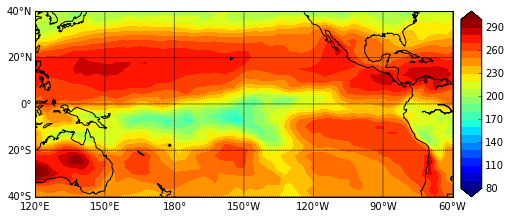

In [17]:
plot_field(m, dset.sel(time=('1998-1-1'))['olr'], lats, lons, 80, 300, 10, grid=True)

<br>
How does that compare with the *climatology* ? well, **xray** implements the *groupby* method of Pandas, making it 
trivial to calculate a climatology

<br>
### Calculates a monthly climatology using the groupby machinery

In [18]:
clim = dset.groupby('time.month').mean('time')

In [19]:
clim

<xray.Dataset>
Dimensions:  (lat: 33, lon: 73, month: 12)
Coordinates:
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    olr      (month, lat, lon) float64 214.7 210.9 206.2 209.3 211.1 207.9 ...

<br>
Lets' plot the monthly climatology above, using the `calendar` module to display the month's names

In [20]:
from calendar import month_name

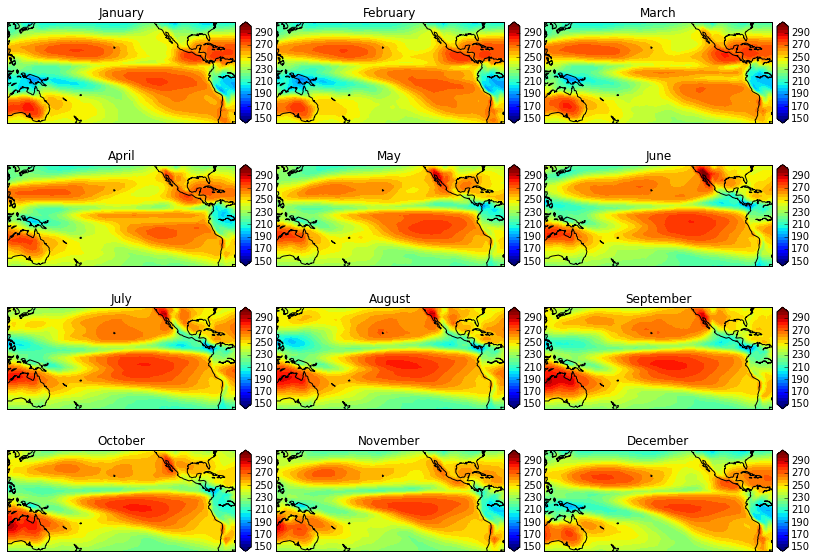

In [21]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(range(1,13)): 
    ax = axes[i]
    plot_field(m, clim['olr'][i,:,:], lats, lons, 150, 300, 5, ax=ax, title=month_name[month])

<br>
xray supports the “derived” datetime components implemented by pandas, including “year”, “month”, “day”, “hour”, “minute”, “second”, “dayofyear”, “week”, “dayofweek”, “weekday” and “quarter”, it also adds **season** to the list of datetime components, which defines the *standard* climatological seasons (December - February, March - May, June - August and September - November)

In [22]:
seas_clim = dset.groupby('time.season').mean('time')

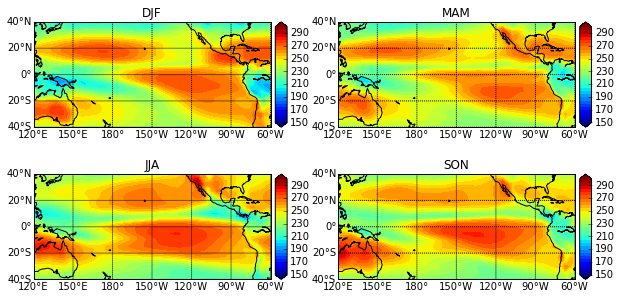

In [23]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.2, wspace=0.2)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(m, seas_clim['olr'][i,:,:], lats, lons, 150, 300, 5, ax=ax, title=seas, grid=True)

<br>
Similarly to Pandas, instead of using the standard methods that can be applied to a groupby object, you can define 
**your own function**, and pass it to the groupby object via the `apply` method. 

<br>
For example, you can easily calculate the **anomalies with respect to a given climatological period in two steps**:

In [24]:
def demean(x): 
    return x - x.sel(time=slice('1981-1-1','2010-12-1')).mean('time')

In [25]:
olr_anoms = dset.groupby('time.month').apply(demean)

In [26]:
olr_anoms

<xray.Dataset>
Dimensions:  (lat: 33, lon: 73, time: 475)
Coordinates:
  * lon      (lon) float32 120.0 122.5 125.0 127.5 130.0 132.5 135.0 137.5 ...
  * lat      (lat) float32 40.0 37.5 35.0 32.5 30.0 27.5 25.0 22.5 20.0 17.5 ...
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
Data variables:
    olr      (time, lat, lon) float64 12.5 15.4 9.152 2.465 -1.335 0.5553 ...
    month    (time) int32 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 ...
Attributes:
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.interp_OLR.html
    history: Created from daily OLR files obtained at NCEP and further processed. Stored in netCDF in 1996. Last update 10/2003
    title: Monthly means of OLR from interpolated OLR dataset
    Conventions: COARDS
    platform: Observation
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily (from which means are calculated)
    reference: Liebmann and Smith: June 20

<br>
Let's plot the anomalies for January 1998 (El Niño again)

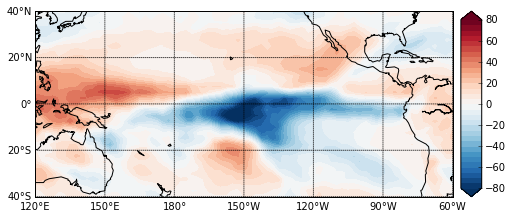

In [27]:
plot_field(m, olr_anoms['olr'].sel(time='1998-1-1'), lats, lons, -80, 80, 5, title='', \
           grid=True, cmap=plt.get_cmap('RdBu_r'))

<br>
### dumps a `xray.Dataset` object into a netcdf (Version 4) file

It is very easy to save a `xray.Dataset` into a netcdf file with the `to_netcdf` method.

<br>
Note: it works only with a `xray.Dataset` object, if you have a `Dataarray`, you can cast it to a `Dataset`, an example below where I: 

1) extract the `Dataarray` holding the `olr` variable  

2) cast it again as a `Dataset`

In [28]:
olr = olr_anoms['olr']

In [29]:
type(olr)

xray.core.dataarray.DataArray

In [30]:
olr = olr.to_dataset()

In [31]:
type(olr)

xray.core.dataset.Dataset

In [32]:
olr.to_netcdf('./olr_anomalies.nc')

<br>
### Creates a xray dataset object from numpy arrays using a Python dictionnary

<br>
One of the killer feature of xray for me is the ability to create a `xray.Dataset` from scratch 
(and saves it to disk in netcdf)

<br>
Below I create the *coordinates* variables arrays: here latitudes, longitudes, level and time, i.e like in a
standard climate dataset 

In [33]:
lon = np.linspace(0, 357.5, 144, endpoint=True)
lat = np.linspace(-90,90, 73, endpoint=True)

lons, lats = np.meshgrid(lon,lat)

lev = np.array([1000,925,850])
time = pd.date_range(start='2015-1-1',end='2015-1-3')

<br>
Then the data variable array

In [34]:
arr = np.random.randn(3,3,73,144)

<br>
To create a `xray.Dataset`, you first create a Python dictionnary: 
+ The dictionnary **keys** are the **names of the variables contained** in the Dataset.<br><br>
+ The Dictionnary **values** are **tuples**, with first the (or the list of) **dimension(s)** over which the array varies, then the **array** itself (defined above)

In [35]:
d = {}
d['time'] = ('time',time)
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['level'] = ('level', lev)
d['var'] = (['time','level','latitudes','longitudes'], arr)

<br>
Then you pass this dictionnary to the `Dataset` function

In [36]:
dset_from_dict = xray.Dataset(d)

<br>
You can easily add global and variables attributes

In [37]:
dset_from_dict.attrs['creation_date'] = datetime.utcnow().strftime("%Y-%m-%d")

In [38]:
dset_from_dict.longitudes.attrs['units'] = 'degrees_east'
dset_from_dict.latitudes.attrs['units'] = 'degrees_north'

<br>
Then you can save to disk as seen above

In [39]:
dset_from_dict.to_netcdf('./dset_from_dict.nc')

In [40]:
!ncdump -h ./dset_from_dict.nc

netcdf dset_from_dict {
dimensions:
	time = 3 ;
	latitudes = 73 ;
	longitudes = 144 ;
	level = 3 ;
variables:
	float longitudes(longitudes) ;
		longitudes:units = "degrees_east" ;
	float latitudes(latitudes) ;
		latitudes:units = "degrees_north" ;
	float var(time, level, latitudes, longitudes) ;
	int time(time) ;
		time:units = "days since 2015-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	int level(level) ;

// global attributes:
		:creation_date = "2015-08-18" ;
}


<br>
This was a very brief introduction to the power of **xray** for manipulating labelled N-dimensional arrays, again head
to the [excellent xray documentation](http://xray.readthedocs.org/en/stable/index.html) to learn more